In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn import metrics  
from sklearn import utils  
import time
import os
import seaborn as sns

ALL CELLS (30% of data)

In [2]:
df = pd.read_parquet('../data/04_feature/concatenated_combined_functional_genomics_data.parquet', engine='pyarrow')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250988 entries, 0 to 250987
Columns: 3369 entries, chr to y_MA1540.2_f
dtypes: float32(12), int16(3349), int32(6), string(2)
memory usage: 1.6 GB


,chr,x,x_start,x_end,y,y_start,y_end,cell_type,label,x_CTCF_ChIP_seq_peaks_counts,...,y_MA1630.2_f,y_MA1630.2_r,y_MA1633.2_r,y_MA1633.2_f,y_MA1647.2_r,y_MA1647.2_f,y_MA0597.2_f,y_MA0597.2_r,y_MA1540.2_r,y_MA1540.2_f
0,1,845000,842500,847500,895000,892500,897500,IMR90,0,0,...,0,0,0,0,0,0,0,0,0,0
34330,1,845000,842500,847500,895000,892500,897500,IMR90,0,0,...,2,1,0,0,1,0,0,0,0,0
72623,1,845000,842500,847500,895000,892500,897500,IMR90,0,0,...,0,0,0,0,0,0,0,0,0,0
108429,1,845000,842500,847500,895000,892500,897500,IMR90,0,0,...,0,0,0,0,0,0,0,0,0,0
145352,1,845000,842500,847500,895000,892500,897500,IMR90,1,0,...,4,1,0,0,1,0,0,0,0,0


In [3]:
df = df.drop(['x_start', 'x_end', 'y_start', 'y_end', 'chr', 'x', 'y'], axis=1)
df = df.loc[df.loc[:, 'cell_type']=='GM12878',:]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57101 entries, 2 to 250986
Columns: 3362 entries, cell_type to y_MA1540.2_f
dtypes: float32(12), int16(3349), string(1)
memory usage: 368.2 MB


,cell_type,label,x_CTCF_ChIP_seq_peaks_counts,y_CTCF_ChIP_seq_peaks_counts,x_DNase_seq_peaks_counts,y_DNase_seq_peaks_counts,x_DNase_seq_bigWig_mean,x_DNase_seq_bigWig_max,x_DNase_seq_bigWig_min,y_DNase_seq_bigWig_mean,...,y_MA1630.2_f,y_MA1630.2_r,y_MA1633.2_r,y_MA1633.2_f,y_MA1647.2_r,y_MA1647.2_f,y_MA0597.2_f,y_MA0597.2_r,y_MA1540.2_r,y_MA1540.2_f
2,GM12878,1,1,0,0,1,0.024900,0.455494,0.0,0.105070,...,0,0,0,0,0,0,0,0,0,0
34332,GM12878,0,0,0,0,0,0.161489,4.119520,0.0,0.085036,...,0,0,0,0,0,0,0,0,0,0
72625,GM12878,0,0,0,0,0,0.057267,1.415600,0.0,0.062568,...,0,0,0,0,0,0,0,0,0,0
108431,GM12878,0,0,0,0,0,0.043345,0.548777,0.0,0.030884,...,0,0,0,0,0,0,0,0,0,0
145354,GM12878,0,0,0,0,0,0.034458,0.645825,0.0,0.026547,...,0,0,0,0,0,0,0,0,0,0


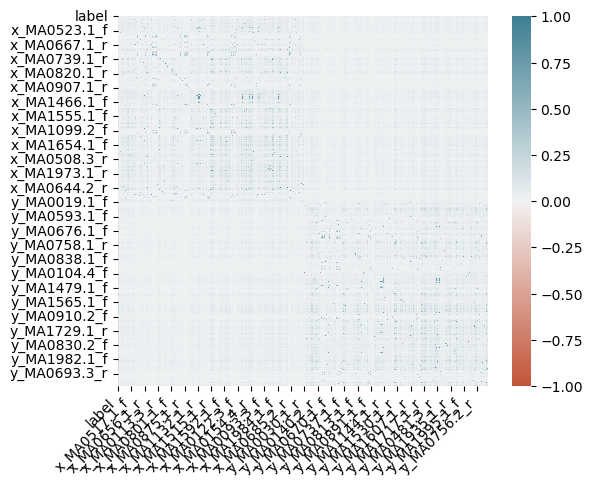

In [4]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [5]:
corr

,label,x_CTCF_ChIP_seq_peaks_counts,y_CTCF_ChIP_seq_peaks_counts,x_DNase_seq_peaks_counts,y_DNase_seq_peaks_counts,x_DNase_seq_bigWig_mean,x_DNase_seq_bigWig_max,x_DNase_seq_bigWig_min,y_DNase_seq_bigWig_mean,y_DNase_seq_bigWig_max,...,y_MA1630.2_f,y_MA1630.2_r,y_MA1633.2_r,y_MA1633.2_f,y_MA1647.2_r,y_MA1647.2_f,y_MA0597.2_f,y_MA0597.2_r,y_MA1540.2_r,y_MA1540.2_f
label,1.000000,0.028555,0.032361,-0.083459,-0.086846,0.096822,0.048151,-0.074274,0.092856,0.038303,...,-0.044844,-0.035488,-0.035872,-0.032159,-0.013791,-0.008478,-0.040284,-0.037003,-0.024789,-0.020653
x_CTCF_ChIP_seq_peaks_counts,0.028555,1.000000,0.103850,0.321689,0.021081,0.203364,0.190810,0.034260,0.011818,0.018965,...,0.071257,0.061061,0.049285,0.054631,0.036849,0.042724,0.078704,0.067018,0.045489,0.054731
y_CTCF_ChIP_seq_peaks_counts,0.032361,0.103850,1.000000,0.022212,0.310153,0.013137,0.028597,-0.013126,0.188020,0.154823,...,0.098537,0.076127,0.014695,0.021605,0.044527,0.050809,0.113350,0.091137,0.050815,0.048400
x_DNase_seq_peaks_counts,-0.083459,0.321689,0.022212,1.000000,0.214673,0.505527,0.432160,0.201110,0.156308,0.143859,...,0.199265,0.199531,0.108795,0.113363,0.081935,0.092348,0.172225,0.167455,0.115377,0.108469
y_DNase_seq_peaks_counts,-0.086846,0.021081,0.310153,0.214673,1.000000,0.154362,0.157763,0.082110,0.495884,0.369227,...,0.393173,0.378066,0.178053,0.192197,0.167866,0.149161,0.293815,0.300958,0.193232,0.195448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y_MA1647.2_f,-0.008478,0.042724,0.050809,0.092348,0.149161,0.064387,0.059214,0.015652,0.074166,0.055982,...,0.078584,0.095699,0.060809,0.036019,0.038794,1.000000,0.060583,0.085223,0.067965,0.060648
y_MA0597.2_f,-0.040284,0.078704,0.113350,0.172225,0.293815,0.109511,0.109658,0.041816,0.180116,0.138950,...,0.301058,0.238251,0.071182,0.087919,0.061875,0.060583,1.000000,0.197542,0.094354,0.123201
y_MA0597.2_r,-0.037003,0.067018,0.091137,0.167455,0.300958,0.116609,0.108034,0.041428,0.188695,0.140952,...,0.246265,0.338274,0.064010,0.077183,0.057557,0.085223,0.197542,1.000000,0.131594,0.102094
y_MA1540.2_r,-0.024789,0.045489,0.050815,0.115377,0.193232,0.069843,0.075234,0.029626,0.073984,0.058976,...,0.108960,0.095813,0.054842,0.059122,0.050281,0.067965,0.094354,0.131594,1.000000,0.094975


In [3]:
df = utils.shuffle(df)

df, _ = train_test_split(df, test_size = 0.30, stratify=df.loc[:, ['cell_type', 'label']])
df_train, df_test = train_test_split(df, test_size = 0.10, stratify=df.loc[:, ['cell_type', 'label']])

df_train.to_parquet('df_train.parquet', engine='pyarrow')
df_test.to_parquet('df_test.parquet', engine='pyarrow')

In [4]:
X_train = df_train.drop(['cell_type', 'label'], axis=1)
y_train = df_train.loc[:, 'label']
del(df_train)
X_test = df_test.drop(['cell_type', 'label'], axis=1)
y_test = df_test.loc[:, 'label']
del(df_test)

In [2]:
df_train = pd.read_parquet('df_train.parquet', engine='pyarrow')
X_train = df_train.drop(['cell_type', 'label'], axis=1)
y_train = df_train.loc[:, 'label']
del(df_train)

Random Forest

In [3]:
clf = RandomForestClassifier()  
clf.fit(X_train, y_train)

RandomForestClassifier()

ACCURACY OF THE MODEL:  0.8373363688104724
AUC: 0.5046786732846954


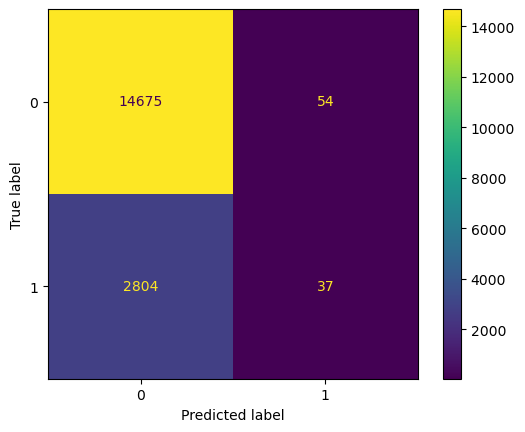

In [4]:
df_test = pd.read_parquet('df_test.parquet', engine='pyarrow')
X_test = df_test.drop(['cell_type', 'label'], axis=1)
y_test = df_test.loc[:, 'label']
del(df_test)

y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

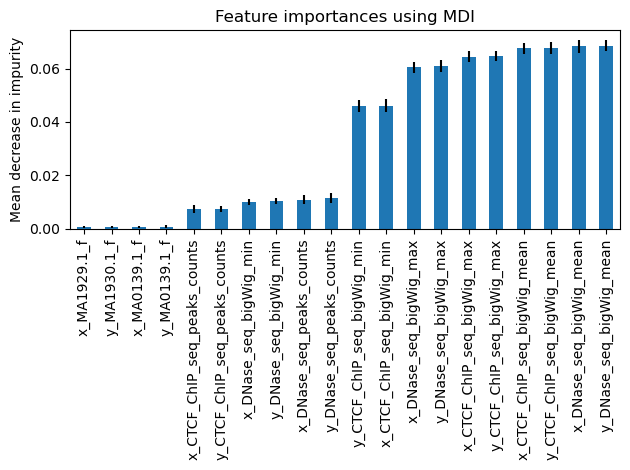

In [5]:
start_time = time.time()
importances = clf.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
std = std[idxs]
names = clf.feature_names_in_[idxs]
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Logistic Regression

In [6]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

: 

: 

In [36]:
#auc
metrics.roc_auc_score(y_test, y_pred) 

0.6047213783853403

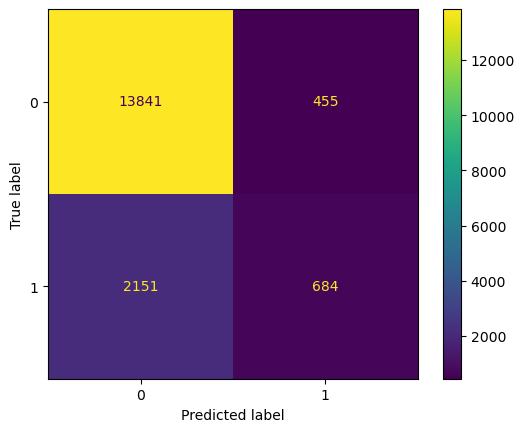

In [37]:
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

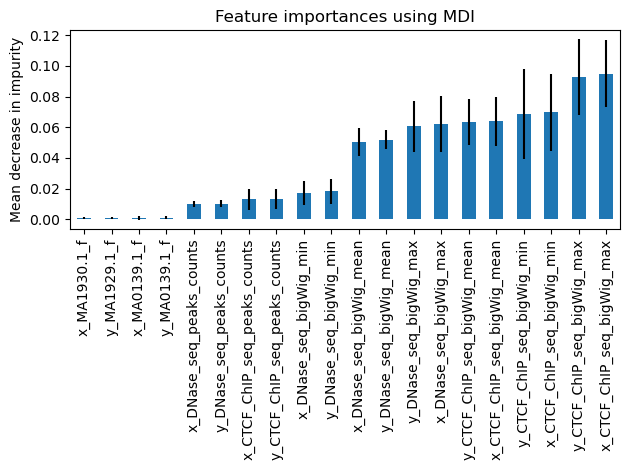

In [39]:
start_time = time.time()
importances = clf.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
std = std[idxs]
names = clf.feature_names_in_[idxs]
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

XGboost

In [2]:
train_list = os.listdir('../data/05_model_input')
train_list = [x for x in train_list if 'train' in x]
train_list.sort()
train_list = [os.path.join('../data/05_model_input', x) for x in train_list]

['../data/05_model_input/concatenated_combined_functional_genomics_data_train_0.parquet',
 '../data/05_model_input/concatenated_combined_functional_genomics_data_train_1.parquet',
 '../data/05_model_input/concatenated_combined_functional_genomics_data_train_2.parquet',
 '../data/05_model_input/concatenated_combined_functional_genomics_data_train_3.parquet',
 '../data/05_model_input/concatenated_combined_functional_genomics_data_train_4.parquet',
 '../data/05_model_input/concatenated_combined_functional_genomics_data_train_5.parquet',
 '../data/05_model_input/concatenated_combined_functional_genomics_data_train_6.parquet',
 '../data/05_model_input/concatenated_combined_functional_genomics_data_train_7.parquet']

In [3]:
xgb_classifier = xgb.XGBClassifier(n_estimators=1000, objective='binary:logistic', tree_method='hist')

for i, path in enumerate(train_list):
    print(f'Step: {i}',end = ' ')
    df = pd.read_parquet(path, engine='pyarrow')
    X_train = df.drop(['cell_type', 'label'], axis=1)
    y_train = df.loc[:, 'label']
    del(df)
    if i == 0:
        xgb_classifier.fit(X_train, y_train,
                        verbose=False)
    else:
        xgb_classifier.fit(X_train, y_train,
                        verbose=False, 
                        xgb_model = xgb_classifier
                        )
    del(X_train)
    del(y_train)

df = pd.read_parquet('../data/05_model_input/concatenated_combined_functional_genomics_data_test.parquet', engine='pyarrow')
X_test = df.drop(['cell_type', 'label'], axis=1)
y_test = df.loc[:, 'label']

y_pred = xgb_classifier.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

Step: 0 

/home/ola/miniconda3/envs/mgr2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Step: 1 Step: 2 Step: 3 Step: 4 Step: 5 Step: 6 Step: 7 ACCURACY OF THE MODEL:  0.7696720984899796


In [5]:
# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=1000, objective='binary:logistic', tree_method='hist')
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

/home/ola/miniconda3/envs/mgr2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACCURACY OF THE MODEL:  0.9849979569202031


In [4]:
#auc
metrics.roc_auc_score(y_test, y_pred) 

0.5650583784614203

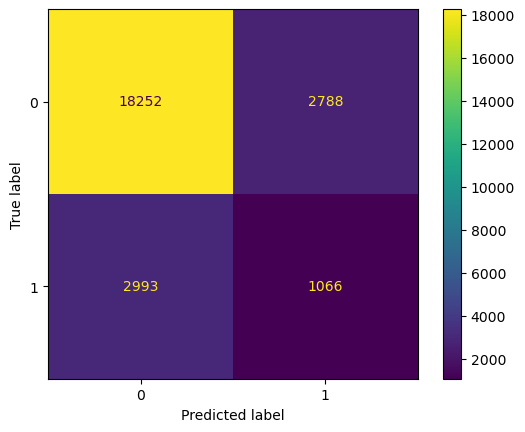

In [5]:
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

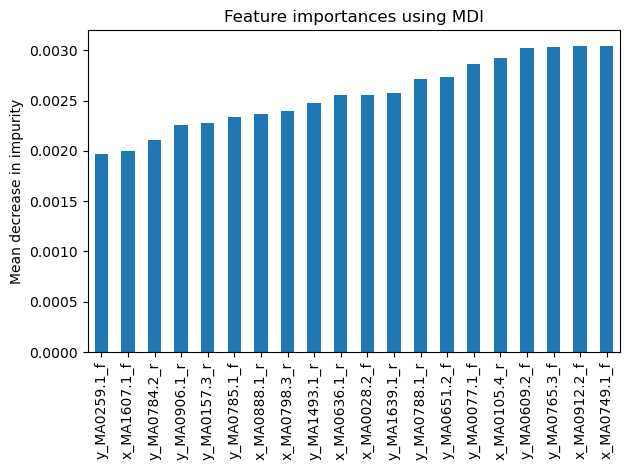

In [6]:
start_time = time.time()
importances = xgb_classifier.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
#std = np.std([tree.feature_importances_ for tree in xgb_classifier.estimators_], axis=0)
#std = std[idxs]
names = np.array(xgb_classifier.get_booster().feature_names)[idxs]
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

CELL: GM12878

In [2]:
df = pd.read_parquet('../data/04_feature/concatenated_combined_functional_genomics_data.parquet', engine='pyarrow')
df = df.loc[df.loc[:, 'cell_type']=='GM12878',:]
x = df.drop(['label', 'x_start', 'x_end', 'y_start', 'y_end', 'cell_type', 'chr', 'x', 'y'], axis=1)
y = df['label']

del(df)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y)

del(x)
del(y)

Random Forest

In [5]:
clf = RandomForestClassifier()  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_pred_proba)

0.9674071211937282

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

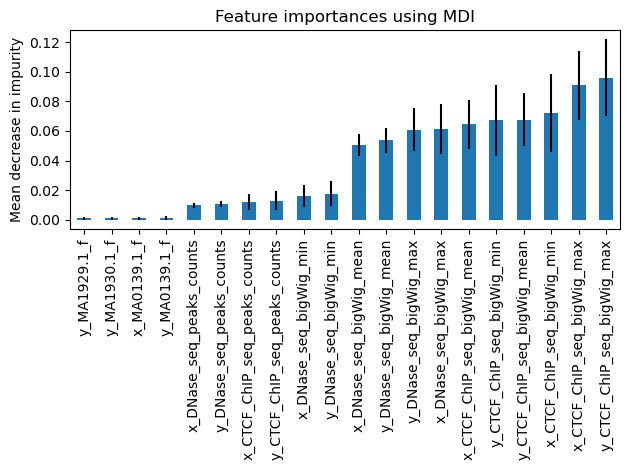

In [6]:
start_time = time.time()
importances = clf.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
std = std[idxs]
names = clf.feature_names_in_[idxs]
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

XGboost

/home/ola/miniconda3/envs/mgr2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


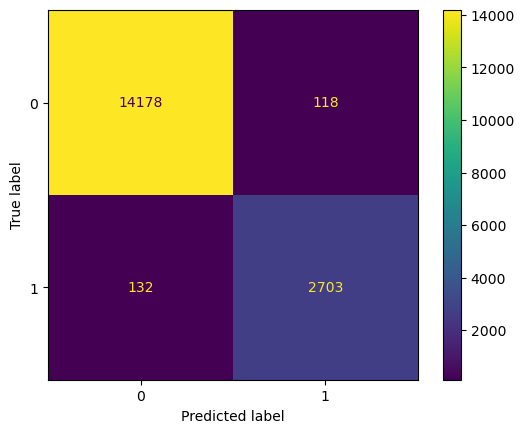

In [7]:
# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=1000, objective='binary:logistic', tree_method='hist')
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)


metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

ACCURACY OF THE MODEL:  0.985406572879575
AUC: 0.9725925481801251


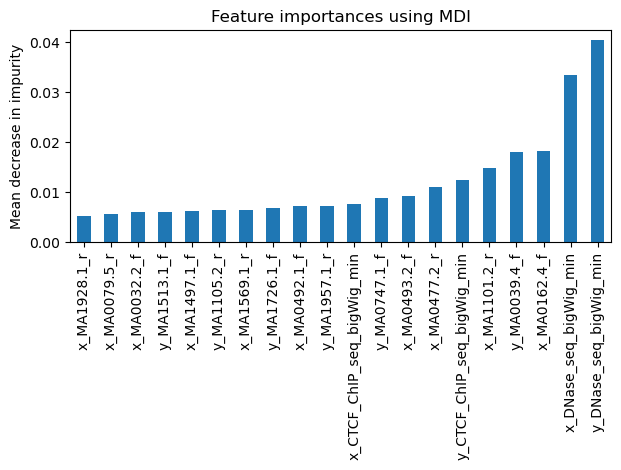

In [8]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")

importances = xgb_classifier.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
#std = np.std([tree.feature_importances_ for tree in xgb_classifier.estimators_], axis=0)
#std = std[idxs]
names = np.array(xgb_classifier.get_booster().feature_names)[idxs]

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

MA0162.4	EGR1
MA1101.2	BACH2
MA0477.2	FOSL1
MA0493.2	KLF1
MA0747.1	SP8
MA1957.1	HOXB2::ELK1
MA0492.1	JUND
MA1726.1	ZNF331
MA1569.1	TFAP2E
MA1105.2	GRHL2
MA1497.1	HOXA6
MA1513.1	KLF15
MA0032.2	FOXC1
MA0079.5	SP1
MA1928.1	BNC2

CELL: GM12878 - FEATURE SELECTION

In [6]:
df = pd.read_parquet('../data/04_feature/concatenated_combined_functional_genomics_data.parquet', engine='pyarrow')
df = df.loc[df.loc[:, 'cell_type']=='GM12878',:]
x = df[['x_DNase_seq_bigWig_min', 'y_DNase_seq_bigWig_min',
        'x_DNase_seq_bigWig_max', 'y_DNase_seq_bigWig_max',
        'x_DNase_seq_bigWig_mean', 'y_DNase_seq_bigWig_mean',
        'x_DNase_seq_peaks_counts', 'y_DNase_seq_peaks_counts',
        'x_CTCF_ChIP_seq_bigWig_min', 'y_CTCF_ChIP_seq_bigWig_min',
        'x_CTCF_ChIP_seq_bigWig_max', 'y_CTCF_ChIP_seq_bigWig_max',
        'x_CTCF_ChIP_seq_bigWig_mean', 'y_CTCF_ChIP_seq_bigWig_mean',
        'x_CTCF_ChIP_seq_peaks_counts', 'y_CTCF_ChIP_seq_peaks_counts',
        'x_MA1929.1_f', 'y_MA1929.1_f', 'x_MA1929.1_r', 'y_MA1929.1_r',
        'x_MA1930.1_f', 'y_MA1930.1_f', 'x_MA1930.1_r', 'y_MA1930.1_r',
        'x_MA0139.1_f', 'y_MA0139.1_f', 'x_MA0139.1_r', 'y_MA0139.1_r',
        ]]
y = df['label']

del(df)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y)

del(x)
del(y)

Random Forest

ACCURACY OF THE MODEL:  0.9529507909637499
AUC: 0.8944688589647553


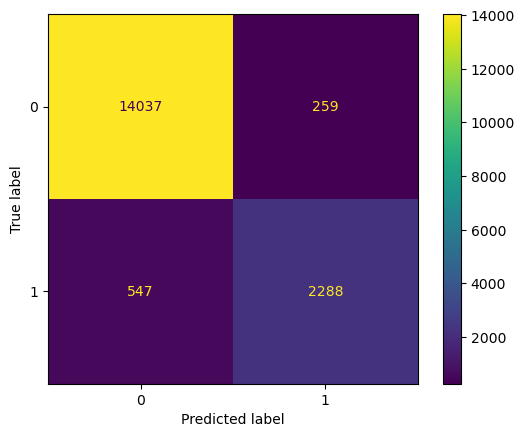

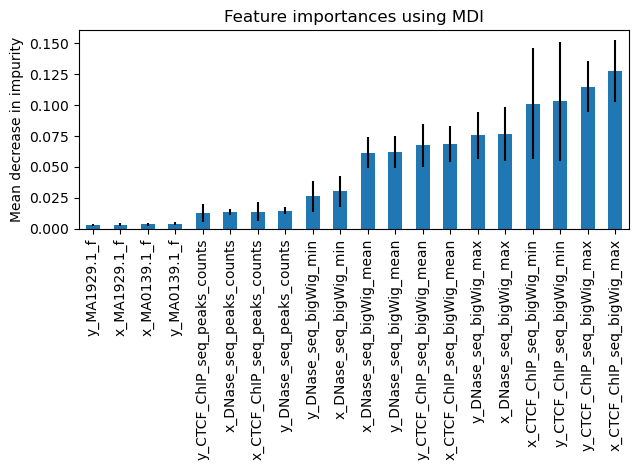

In [7]:
clf = RandomForestClassifier()  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

start_time = time.time()
importances = clf.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
std = std[idxs]
names = clf.feature_names_in_[idxs]
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

XGboost

/home/ola/miniconda3/envs/mgr2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:47:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


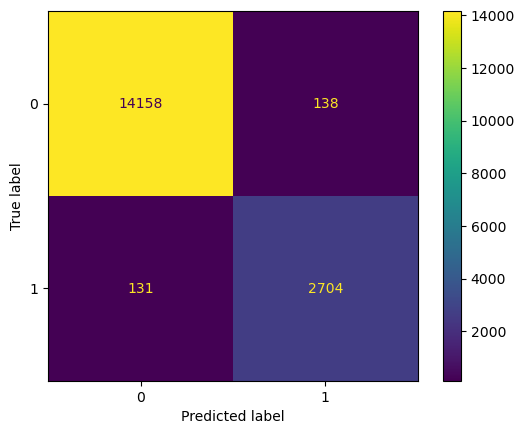

In [8]:
# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=1000, objective='binary:logistic', tree_method='hist')
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)


metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

ACCURACY OF THE MODEL:  0.9842974724184227
AUC: 0.9720694186605396


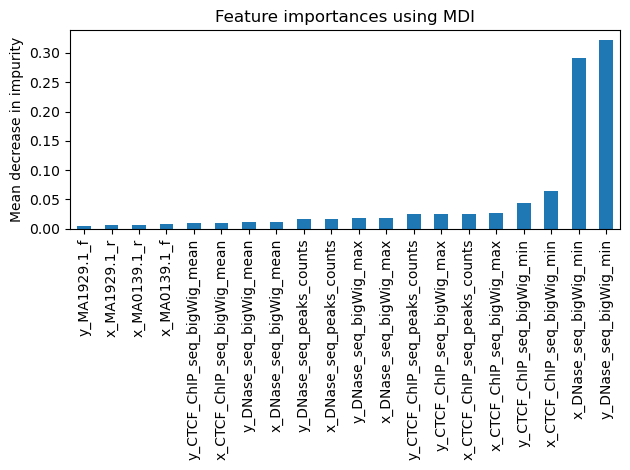

In [9]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")

importances = xgb_classifier.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
#std = np.std([tree.feature_importances_ for tree in xgb_classifier.estimators_], axis=0)
#std = std[idxs]
names = np.array(xgb_classifier.get_booster().feature_names)[idxs]

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

CELL: HMEC

In [2]:
df = pd.read_parquet('../data/04_feature/concatenated_combined_functional_genomics_data.parquet', engine='pyarrow')
df = df.loc[df.loc[:, 'cell_type']=='HMEC',:]

x = df.drop(['label', 'x_start', 'x_end', 'y_start', 'y_end', 'cell_type', 'chr', 'x', 'y'], axis=1)
y = df['label']

del(df)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y)

del(x)
del(y)

Random Forest

ACCURACY OF THE MODEL:  0.8816959197629359
AUC: 0.68005782457326


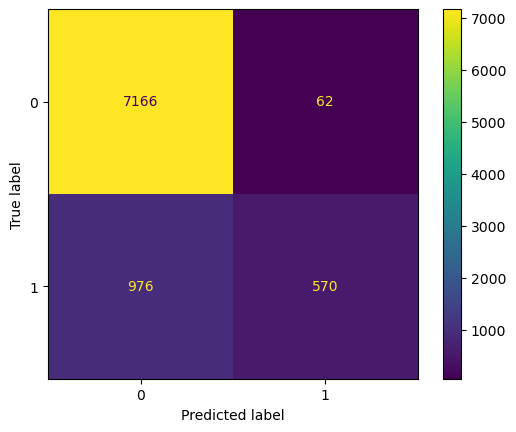

In [3]:
clf = RandomForestClassifier()  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

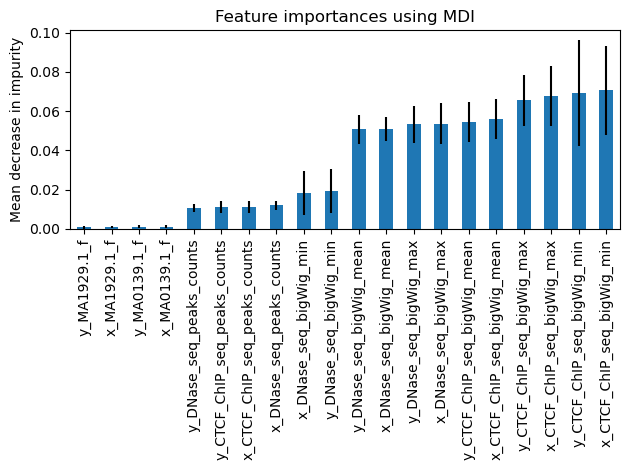

In [4]:
start_time = time.time()
importances = clf.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
std = std[idxs]
names = clf.feature_names_in_[idxs]
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

XGboost

/home/ola/miniconda3/envs/mgr2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:57:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACCURACY OF THE MODEL:  0.9671757465238203
AUC: 0.9388906229976711


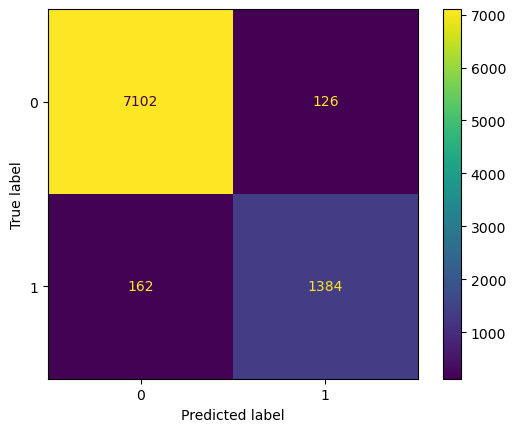

In [5]:
# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=1000, objective='binary:logistic', tree_method='hist')
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)


metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

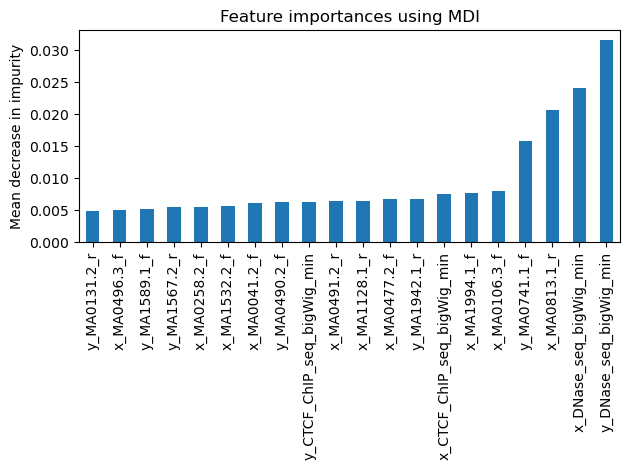

In [8]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")

importances = xgb_classifier.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
#std = np.std([tree.feature_importances_ for tree in xgb_classifier.estimators_], axis=0)
#std = std[idxs]
names = np.array(xgb_classifier.get_booster().feature_names)[idxs]

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

MA0813.1	TFAP2B
MA0741.1	KLF16
MA0106.3	TP53
MA1994.1	Nkx2-1
MA1942.1	ETV2::FOXI1
MA0477.2	FOSL1
MA1128.1	FOSL1::JUN
MA0491.2	JUND
MA0490.2	JUNB
MA0041.2	FOXD3
MA1532.2	NR1D2
MA0258.2	ESR2
MA1567.2	Tbx6
MA1589.1	ZNF140
MA0496.3	MAFK
MA0131.2	HINFP

CELL: K562

In [20]:
df = pd.read_parquet('../data/04_feature/concatenated_combined_functional_genomics_data.parquet', engine='pyarrow')
df = df.loc[df.loc[:, 'cell_type']=='K562',:]

x = df.drop(['label', 'x_start', 'x_end', 'y_start', 'y_end', 'cell_type', 'chr', 'x', 'y'], axis=1)
y = df['label']

del(df)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y)

del(x)
del(y)

Random Forest

ACCURACY OF THE MODEL:  0.8980297933685728
AUC: 0.73298540360037


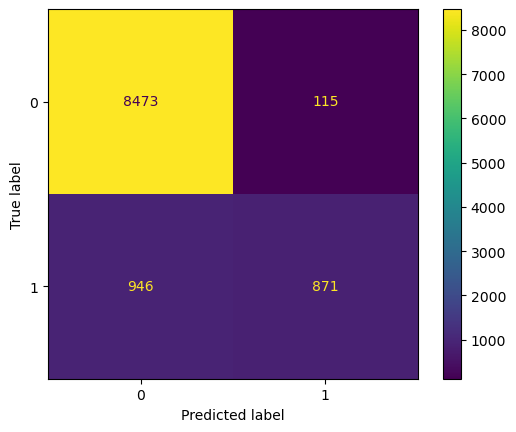

In [21]:
clf = RandomForestClassifier()  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

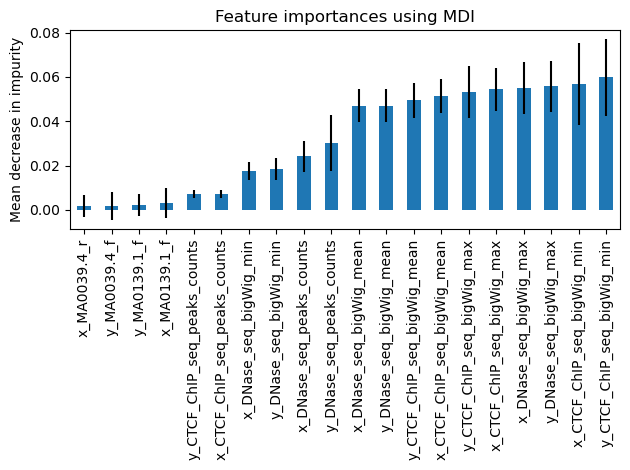

In [22]:
start_time = time.time()
importances = clf.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
std = std[idxs]
names = clf.feature_names_in_[idxs]
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

XGboost

/home/ola/miniconda3/envs/mgr2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:25:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


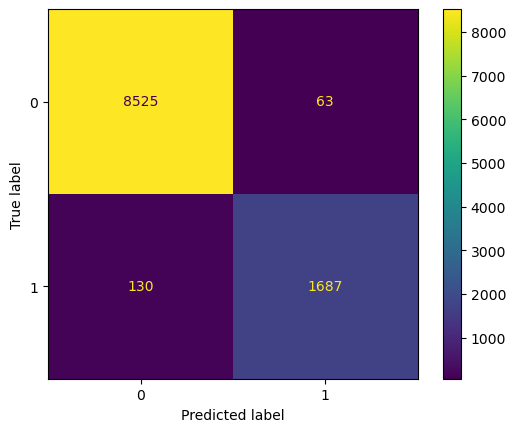

In [23]:
# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist')
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)


metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [24]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")

ACCURACY OF THE MODEL:  0.9814512253724171
AUC: 0.9605588386759731


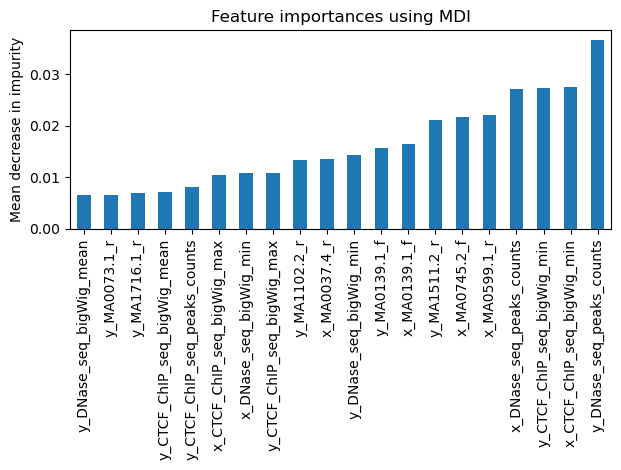

In [25]:
start_time = time.time()
importances = xgb_classifier.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
#std = np.std([tree.feature_importances_ for tree in xgb_classifier.estimators_], axis=0)
#std = std[idxs]
names = np.array(xgb_classifier.get_booster().feature_names)[idxs]
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

FEATURE SELECTION: bigWig data and CTCFs motifs

In [15]:
df = pd.read_parquet('../data/04_feature/concatenated_combined_functional_genomics_data.parquet', engine='pyarrow')

x = df[['x_DNase_seq_bigWig_min', 'y_DNase_seq_bigWig_min',
        'x_DNase_seq_bigWig_max', 'y_DNase_seq_bigWig_max',
        'x_DNase_seq_bigWig_mean', 'y_DNase_seq_bigWig_mean',
        'x_MA0139.1_f', 'x_MA0139.1_r', 'y_MA0139.1_f', 'y_MA0139.1_r',
        'x_MA1929.1_f', 'x_MA1929.1_r', 'y_MA1929.1_f', 'y_MA1929.1_r',
        'x_MA1930.1_f', 'x_MA1930.1_r', 'y_MA1930.1_f', 'y_MA1930.1_r',]]
y = df['label']

del(df)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y)
del(x)
del(y)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.30, stratify=y_train)

Random Forest

ACCURACY OF THE MODEL:  0.8372312309919386
AUC: 0.5084475044915611


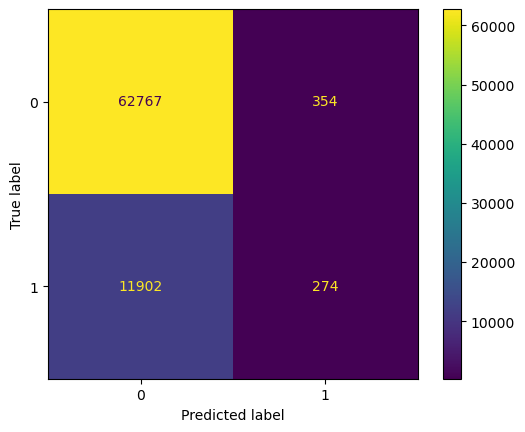

In [18]:
clf = RandomForestClassifier()  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

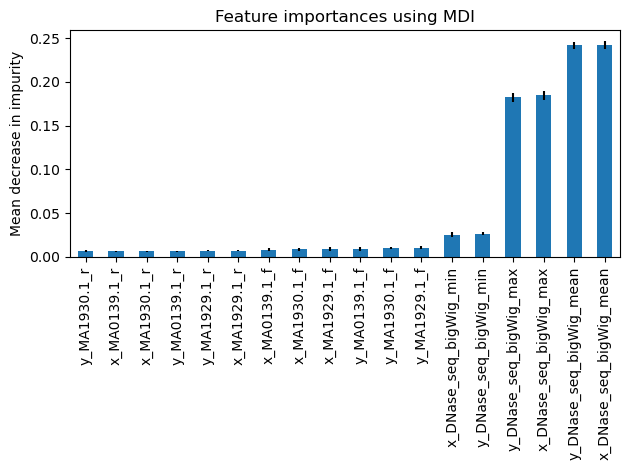

In [19]:
start_time = time.time()
importances = clf.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
std = std[idxs]
names = clf.feature_names_in_[idxs]
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

XGboost

/home/ola/miniconda3/envs/mgr2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:20:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


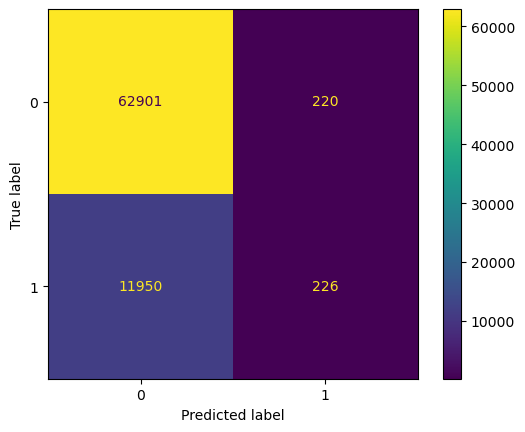

In [16]:
# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist')
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)


metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [17]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")

ACCURACY OF THE MODEL:  0.8383733747692471
AUC: 0.5075378672204175


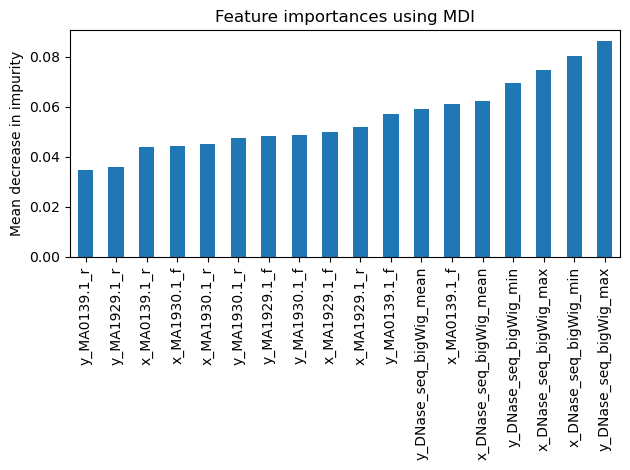

In [14]:
start_time = time.time()
importances = xgb_classifier.feature_importances_
idxs = np.argsort(importances)[-20:]
importances = importances[idxs]
#std = np.std([tree.feature_importances_ for tree in xgb_classifier.estimators_], axis=0)
#std = std[idxs]
names = np.array(xgb_classifier.get_booster().feature_names)[idxs]
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

TRAIN: GM12878

TEST: K562

In [2]:
df = pd.read_parquet('../data/04_feature/concatenated_combined_functional_genomics_data.parquet', engine='pyarrow')
df_train = df.loc[df.loc[:, 'cell_type']=='GM12878',:]

X_train = df_train.drop(['label', 'x_start', 'x_end', 'y_start', 'y_end', 'cell_type', 'chr', 'x', 'y'], axis=1)
y_train = df_train['label']

del(df_train)

df_test = df.loc[df.loc[:, 'cell_type']=='K562',:]
X_test = df_test.drop(['label', 'x_start', 'x_end', 'y_start', 'y_end', 'cell_type', 'chr', 'x', 'y'], axis=1)
y_test = df_test['label']

XGboost

/home/ola/miniconda3/envs/mgr2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:28:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


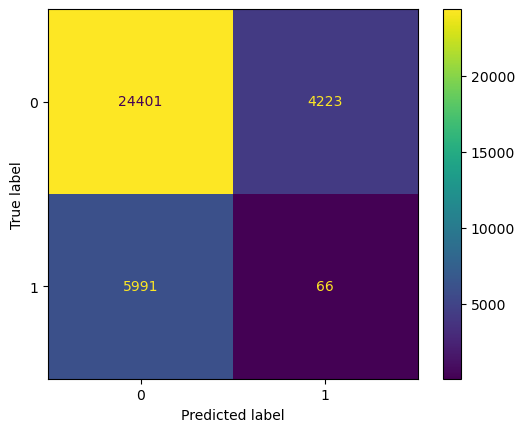

In [3]:
# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist')
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)


metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [4]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")

ACCURACY OF THE MODEL:  0.7054871543496439
AUC: 0.4316814725590401


4 TYPES OF CELLS

In [2]:
df = pd.read_parquet('../data/04_feature/concatenated_combined_functional_genomics_data.parquet', engine='pyarrow')

df = df.drop(['x_start', 'x_end', 'y_start', 'y_end', 'chr', 'x', 'y'], axis=1)
df = df[df['cell_type'].isin(['GM12878', 'K562', 'HMEC'])]

df_train, df_test = train_test_split(df, test_size = 0.3, stratify=df.loc[:, ['label', 'cell_type']])

X_train = df_train.drop(['label', 'cell_type'], axis=1)
y_train = df_train['label']
del(df_train)
X_test = df_test.drop(['label', 'cell_type'], axis=1)
y_test = df_test['label']
del(df_test)

XGboost

In [3]:
# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist')
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)


metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

/home/ola/miniconda3/envs/mgr2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


: 

: 

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#auc
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")

In [2]:
if [1]:
    print('a')

a


In [2]:
df = pd.read_parquet('../data/04_feature/concatenated_combined_functional_genomics_data.parquet', engine='pyarrow')
df = df.drop(['chr', 'x', 'x_start', 'x_end', 'y', 'y_start', 'y_end'], axis=1)
df = df.groupby('cell_type')
df = {cell_type: df_cell for cell_type, df_cell in df}
df

{'GM12878':        cell_type  label  x_CTCF_ChIP_seq_peaks_counts  \
 2        GM12878      1                             1   
 34332    GM12878      0                             0   
 72625    GM12878      0                             0   
 108431   GM12878      0                             0   
 145354   GM12878      0                             0   
 ...          ...    ...                           ...   
 72621    GM12878      0                             1   
 108427   GM12878      0                             1   
 145350   GM12878      0                             1   
 179085   GM12878      0                             1   
 250986   GM12878      0                             1   
 
         y_CTCF_ChIP_seq_peaks_counts  x_DNase_seq_peaks_counts  \
 2                                  0                         0   
 34332                              0                         0   
 72625                              0                         0   
 108431                